In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import mmread

In [2]:
test_csv = pd.read_csv('data/Test.csv')
train_csv = pd.read_csv('data/Train.csv')

train_y = train_csv['label']
test_y = test_csv['label']

x_train_tf = mmread('data/x_train_tf.mtx')
x_test_tf = mmread('data/x_test_tf.mtx')

In [4]:
random_forest = RandomForestClassifier()
n_estimators = [10, 50, 100, 500, 1000]
max_depth = [10, 20, 40, 50, 60, 70]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

hyperparameters = dict(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    bootstrap=bootstrap
)

In [5]:
clf = RandomizedSearchCV(estimator=random_forest,
                         param_distributions=hyperparameters,
                         n_jobs=-1,
                         cv=5,
                         verbose=2)
clf = clf.fit(x_train_tf, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  11.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  11.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  11.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  11.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  11.3s
[CV] END bootstrap=False, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 1.6min
[CV] END bootstrap=False, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 1.6min
[CV] END bootstrap=False, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 1.6min
[CV

In [6]:
best_clf = clf.best_estimator_
y_pred = best_clf.predict(x_test_tf)

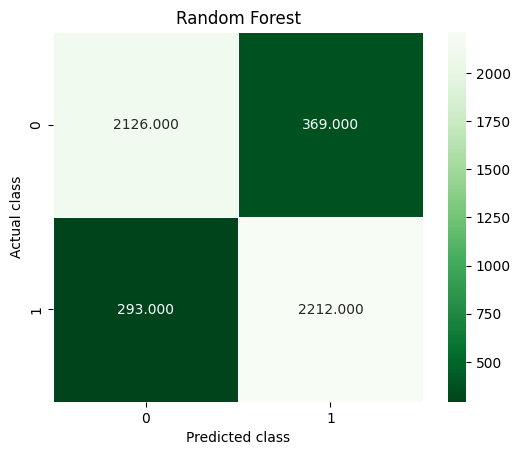

In [7]:
matrix = confusion_matrix(test_y, y_pred)
plt.figure()
sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Greens_r")
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Random Forest', size=12)
plt.show()

In [8]:
metrics = classification_report(test_y, y_pred)
print(metrics)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      2495
           1       0.86      0.88      0.87      2505

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000

